<table style="width: 100%;">
    <tr style="background-color: transparent;"><td>
        <img src="https://data-88e.github.io/assets/images/blue_text.png" width="250px" style="margin-left: 0;" />
    </td><td>
        <p style="text-align: right; font-size: 10pt;"><strong>Economic Models</strong>, Fall 2023<br>
            Dr. Eric Van Dusen <br>
      </p></td></tr>
</table>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
import plotly.graph_objects as go

## Mortgage Calculator

Lets build some widgets to allow you to select the 
- Principal - amount of loan
- Interestes Rate - annual interest rate
- Years:  - Years of Loan term ( usually 30 or 15) 

You can consult BankRate to look up resonable rates
https://www.bankrate.com/mortgages/mortgage-rates/

In [ ]:

principal_widget = widgets.FloatSlider( value=200000, min=0, max=1000000, step=100, description='Principal:', readout_format='.0f', )
annual_interest_rate_widget = widgets.FloatSlider( value=0.05, min=0, max=0.25, step=0.001, description='Interest Rate:', readout_format='.2f', )
years_widget = widgets.IntSlider( value=30, min=1, max=50, step=1, description='Years:', readout_format='.0f', )

display(principal_widget, annual_interest_rate_widget, years_widget)

In [ ]:
#principal = 200000  
#annual_interest_rate = 0.04  
#years = 30  

principal = principal_widget.value
annual_interest_rate = annual_interest_rate_widget.value
years = years_widget.value



# Formula for Mortgage Payment 

$$ \text{Monthly Payment} = \frac{{\text{Principal} \cdot \left(\text{Monthly Interest Rate} \cdot \left(1 + \text{Monthly Interest Rate}\right)^{\text{Number of Payments}}\right)}}{{\left(1 + \text{Monthly Interest Rate}\right)^{\text{Number of Payments}} - 1}}
$$

## This is what we need to program into Python

In [ ]:
# Calculate monthly interest rate and number of payments
monthly_interest_rate = annual_interest_rate / 12
num_payments = years * 12

#Calculate monthly mortgage payment
monthly_payment = principal * (monthly_interest_rate * (1 + monthly_interest_rate)**num_payments) / ((1 + monthly_interest_rate)**num_payments - 1)
print('Monthly payment: $%.2f' % monthly_payment)
print('Total payment: $%.2f' % (monthly_payment * num_payments))
print('Total interest: $%.2f' % (monthly_payment * num_payments - principal))
print('Total Principal: $%.2f' % principal)
print('Interest to principal ratio: %.2f' % ((monthly_payment * num_payments - principal) / principal))

## Lets Build a dataset of the payments over time
- Each Monthly Payment has a share 
- Principal paid each month
- Interest Payement eah month

### if we build this right we can graph the payments over the life of the loan

In [ ]:
payment_schedule = []
principal_schedule = []
interest_schedule = []


remaining_balance = principal

# This function will calculate the payments and share of intersest and pricipal paid
for month in range(1, num_payments + 1):
    interest_payment = remaining_balance * monthly_interest_rate
    principal_payment = monthly_payment - interest_payment
    remaining_balance -= principal_payment
    payment_schedule.append(monthly_payment)
    principal_schedule.append(principal_payment)
    interest_schedule.append(interest_payment)


## Let's look at the composition of the first 5 and last 5 payments

In [ ]:
print("\nPayment Schedule for the first 5 months:")
for month in range(5):
    print(f"Month {month + 1}: Payment ${payment_schedule[month]:.2f} (Principal ${principal_schedule[month]:.2f}, Interest ${interest_schedule[month]:.2f})")
print("\nPayment Schedule for the last 5 months:")
for month in range(num_payments - 5, num_payments):
    print(f"Month {month + 1}: Payment ${payment_schedule[month]:.2f} (Principal ${principal_schedule[month]:.2f}, Interest ${interest_schedule[month]:.2f})")

## Now we will plot these payments over the 360 months of payback

In [ ]:
# Plot the total interest and principal component of each monthly payment over time
plot = plt.figure()
plt.plot(principal_schedule)
plt.plot(interest_schedule)
plt.plot(payment_schedule)
plt.legend(['Principal', 'Interest', 'Total Payment'], loc='upper left')
plt.xlabel("Month")
plt.ylabel("Amount ($)")
plt.show()

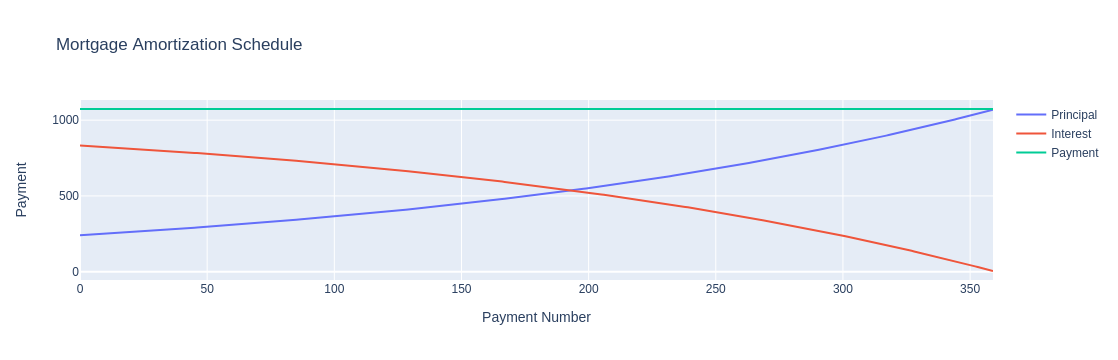

In [51]:
#Plotly version of the same graph

plot = go.Figure()
plot.add_trace(go.Scatter(y=principal_schedule, name="Principal"))
plot.add_trace(go.Scatter(y=interest_schedule, name="Interest"))
plot.add_trace(go.Scatter(y=payment_schedule, name="Payment"))
plot.update_layout(title="Mortgage Amortization Schedule", xaxis_title="Payment Number", yaxis_title="Payment")
plot.show()

## Let's do this for an investment instead of a mortgage
### We will calculate the future value of an investment
### Create widgets to specify the rates
### Slightly different than the Lab

In [ ]:

principal_widget = widgets.FloatSlider(value=1000, min=1, max=10000, step=1, description='Principal')
rate_widget = widgets.FloatSlider(value=0.05, min=0.01, max=0.2, step=0.01, description='Interest Rate')
time_widget = widgets.IntSlider(value=10, min=1, max=30, step=1, description='Time (Years)')
n_widget = widgets.IntSlider(value=12, min=1, max=365, step=1, description='Compounding Frequency')
display(principal_widget, rate_widget, time_widget, n_widget)


# Define a function to calculate future value

In [ ]:
def calculate_future_value(principal, rate, time, n):
    years = np.arange(0, time + 1)
    future_values = principal * (1 + rate / n) ** (n * years)
    return years, future_values

# Calculate and plot the future value of the investment
years, future_values = calculate_future_value(principal_widget.value, rate_widget.value, time_widget.value, n_widget.value)

print("At time = %d years, the future value of the investment is $%.2f" % (time_widget.value, future_values[-1]))

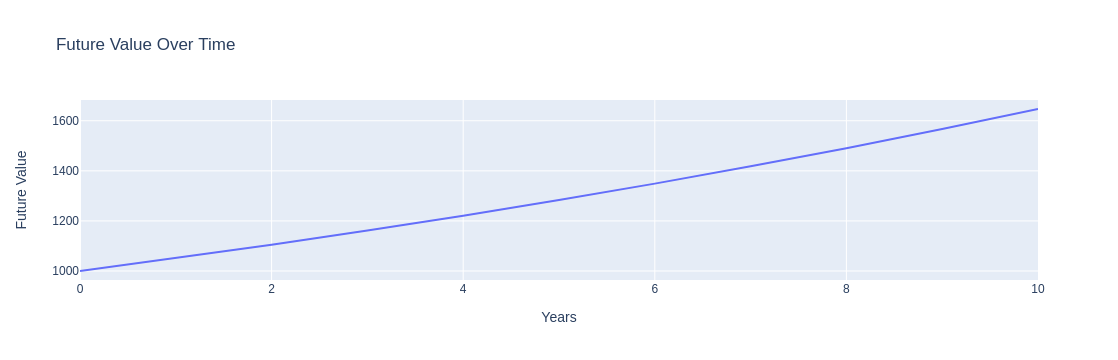

In [ ]:
# Plot the future value of the investment over time

fig = go.Figure()
fig.add_trace(go.Scatter(x=years, y=future_values, mode='lines'))
fig.update_layout(title="Future Value Over Time", xaxis_title="Years", yaxis_title="Future Value")
fig.show()


## Here is a couple more functions to compare mortgage terms

### First to compare two different interest rates

You can consult BankRate to look up resonable rates
https://www.bankrate.com/mortgages/mortgage-rates/



In [ ]:
principal_amount = 200000  # Principal amount of the loan
loan_term_years = 30  # Loan term in years
interest_rates_to_compare = [0.04, 0.08]  # Two different interest rates

In [ ]:
def compare_interest_rates(principal, years, interest_rates):
    results = []
    
    for rate in interest_rates:
        monthly_interest_rate = rate / 12
        num_payments = years * 12
        monthly_payment = principal * (monthly_interest_rate * (1 + monthly_interest_rate)**num_payments) / ((1 + monthly_interest_rate)**num_payments - 1)
        total_payment = monthly_payment * num_payments
        total_interest_paid = total_payment - principal
        interest_as_percent_of_payment = (total_interest_paid / total_payment) * 100

        results.append({
            "interest_rate": rate,
            "monthly_payment": monthly_payment,
            "total_payment": total_payment,
            "total_interest_paid": total_interest_paid,
            "interest_as_percent_of_payment": interest_as_percent_of_payment
        })
    
    return results

results = compare_interest_rates(principal_amount, loan_term_years, interest_rates_to_compare)

for result in results:
    print(f"Interest Rate: {result['interest_rate'] * 100}%")
    print(f"Monthly Payment: ${result['monthly_payment']:.2f}")
    print(f"Total Payment: ${result['total_payment']:.2f}")
    print(f"Total Interest Paid: ${result['total_interest_paid']:.2f}")
    print(f"Interest as % of Payment: {result['interest_as_percent_of_payment']:.2f}%")
    print()



## Redo to can compare two different loan terms

In [ ]:
principal_amount = 200000  # Principal amount of the loan
interest_rate = 0.05  # Annual interest rate (5%)
loan_terms_to_compare = [15, 30] # Two most typical loan terms ( lengths) 

In [ ]:
def compare_loan_terms(principal, years, interest_rate):
    results = []
    
    for loan_term in years:
        # Calculate monthly interest rate and number of payments
        monthly_interest_rate = interest_rate / 12
        num_payments = loan_term * 12

        # Calculate monthly mortgage payment
        monthly_payment = principal * (monthly_interest_rate * (1 + monthly_interest_rate)**num_payments) / ((1 + monthly_interest_rate)**num_payments - 1)

        # Calculate total payment and total interest paid
        total_payment = monthly_payment * num_payments
        total_interest_paid = total_payment - principal

        # Calculate the total interest as a percentage of the total payment
        interest_as_percent_of_payment = (total_interest_paid / total_payment) * 100

        results.append({
            "loan_term": loan_term,
            "monthly_payment": monthly_payment,
            "total_payment": total_payment,
            "total_interest_paid": total_interest_paid,
            "interest_as_percent_of_payment": interest_as_percent_of_payment
        })
    
    return results

# Example usage


results = compare_loan_terms(principal_amount, loan_terms_to_compare, interest_rate)

for result in results:
    print(f"Loan Term: {result['loan_term']} years")
    print(f"Monthly Payment: ${result['monthly_payment']:.2f}")
    print(f"Total Payment: ${result['total_payment']:.2f}")
    print(f"Total Interest Paid: ${result['total_interest_paid']:.2f}")
    print(f"Interest as % of Payment: {result['interest_as_percent_of_payment']:.2f}%")
    print()
